In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../data_files/3.MPG/auto-mpg.data'
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
# mpg - > 燃油效率
# cylinders -> 气缸
# displacement - > 排量
# horsepower - > 马力
# weight - > 重量
# acceleration - > 加速度
# model year - > 型号年份
# origin = > 编号
# car name - > 原产地
cars = pd.read_csv(path, delim_whitespace=True, names=columns)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Text(0.5, 1.0, 'horsepower')

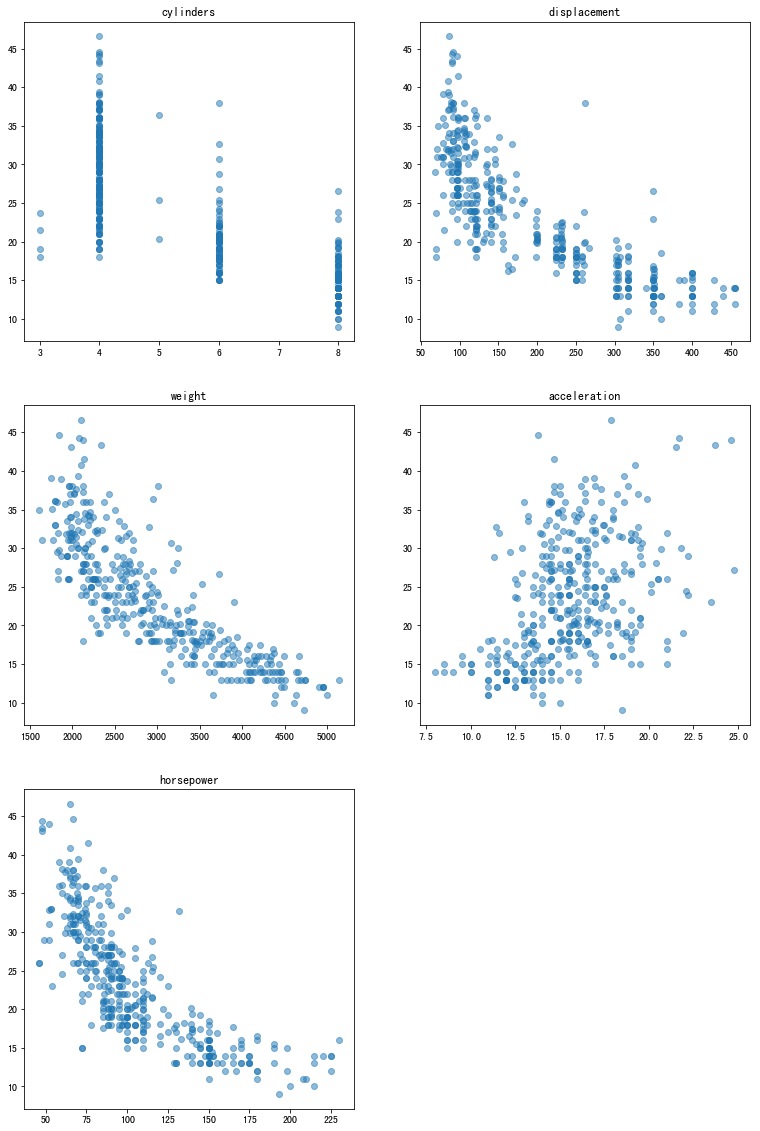

In [4]:
cars = cars[cars.horsepower != '?']
#用散点图分别展示气缸、排量、重量、加速度与燃油效率的关系
fig = plt.figure(figsize=(13,20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.scatter(cars['cylinders'],cars['mpg'],alpha=0.5)
ax1.set_title('cylinders')
ax2.scatter(cars['displacement'],cars['mpg'],alpha=0.5)
ax2.set_title('displacement')
ax3.scatter(cars['weight'],cars['mpg'],alpha=0.5)
ax3.set_title('weight')
ax4.scatter(cars['acceleration'],cars['mpg'],alpha=0.5)
ax4.set_title('acceleration')
ax5.scatter([float(x) for x in cars['horsepower'].tolist()],cars['mpg'],alpha=0.5)
ax5.set_title('horsepower')

In [5]:
Y = cars['mpg']
X = cars[['weight']]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train,Y_train)

In [8]:
print(lr.coef_)
print(lr.intercept_)
print('score = {}'.format(lr.score(X,Y)))

[-0.00772198]
46.43412847740396
score = 0.6925641006507041


# 可视化

## 训练集

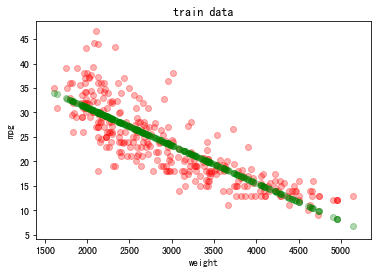

In [9]:
plt.scatter(X_train, Y_train, color = 'red', alpha=0.3)
plt.scatter(X_train, lr.predict(X_train),color = 'green',alpha=0.3)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('train data')
plt.show()

## 测试集

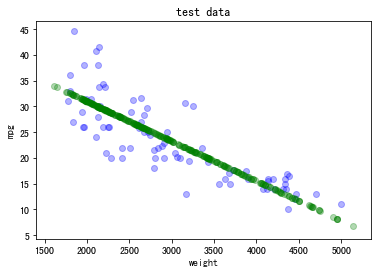

In [10]:
plt.scatter(X_test,Y_test,color = 'blue',alpha=0.3)
plt.scatter(X_train,lr.predict(X_train),color='green',alpha=0.3)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('test data')
plt.show()

## 模型得分

In [11]:
print(lr.coef_)
print(lr.intercept_)
print('score = {}'.format(lr.score(X,Y)))

[-0.00772198]
46.43412847740396
score = 0.6925641006507041


# 多变量线性回归模型

In [12]:
cars = cars[cars.horsepower != '?']
mul = ['weight','horsepower','displacement'] # 选择三个变量进行建立模型
mul_lr = LinearRegression()
mul_lr.fit(cars[mul],cars['mpg']) # 训练模型
cars['mpg_prediction'] = mul_lr.predict(cars[mul])
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg_prediction
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.915289
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,16.197184
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.382258
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,18.479076
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,18.821729


In [13]:
mul_score = mul_lr.score(cars[mul],cars['mpg'])
mul_score

0.7069554693444708

In [14]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(cars['mpg'],cars['mpg_prediction'])
print('mse = %f'%mse)
print('rmse = %f'%np.sqrt(mse))

mse = 17.806188
rmse = 4.219738


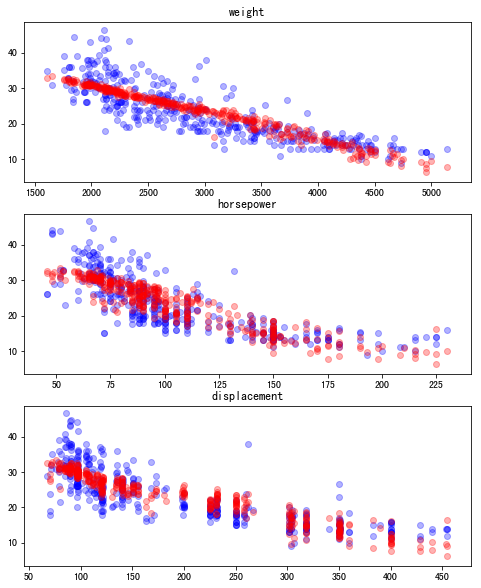

In [15]:
fig = plt.figure(figsize = (8,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.scatter(cars['weight'], cars['mpg'], c='blue', alpha=0.3)
ax1.scatter(cars['weight'], cars['mpg_prediction'], c='red', alpha=0.3)
ax1.set_title('weight')
ax2.scatter([ float(x) for x in cars['horsepower'].tolist()], cars['mpg'], c='blue', alpha=0.3)
ax2.scatter([ float(x) for x in cars['horsepower'].tolist()], cars['mpg_prediction'], c='red', alpha=0.3)
ax2.set_title('horsepower')
ax3.scatter(cars['displacement'], cars['mpg'], c='blue', alpha=0.3)
ax3.scatter(cars['displacement'], cars['mpg_prediction'], c='red', alpha=0.3)
ax3.set_title('displacement')
plt.show()